#  Python project - Student Sleep Patterns 

### Hypothesis

My assumption - the quality of sleep of students depends on students' hours of study, sleep duration, physical activity and screen time

dataset is taken from - https://www.kaggle.com/datasets/arsalanjamal002/student-sleep-patterns/data

### Importing libraries

In [1]:
import pandas as pd #helps to analyse and change the dataset
import matplotlib.pyplot as plt #makes a visualization
import seaborn as sns #makes a visualization

In [2]:
df = pd.read_csv('data/student_sleep_patterns.csv') #data account

### Describing the main details of dataset

In [3]:
df.info() #overall information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         495 non-null    float64
 1   Sleep_Duration     496 non-null    float64
 2   Study_Time         496 non-null    float64
 3   Screen_Time        496 non-null    float64
 4   Caffeine_Intake    496 non-null    float64
 5   Physical_Activity  496 non-null    float64
 6   Sleep_Quality      496 non-null    float64
 7   Free_Time          496 non-null    float64
dtypes: float64(8)
memory usage: 31.1 KB


In [4]:
df.head #investigating the first five rows of our dataset

<bound method NDFrame.head of      Student_ID  Sleep_Duration  Study_Time  Screen_Time  Caffeine_Intake  \
0           1.0           462.0       474.0        204.0              2.0   
1           2.0           378.0       360.0        114.0              5.0   
2           3.0           306.0       402.0        234.0              5.0   
3           4.0           378.0       516.0        168.0              4.0   
4           5.0           282.0       162.0        162.0              0.0   
..          ...             ...         ...          ...              ...   
491       497.0           534.0       462.0        210.0              3.0   
492       498.0           342.0       384.0        234.0              1.0   
493       499.0           294.0        30.0        210.0              0.0   
494       500.0           474.0       696.0         60.0              0.0   
495         NaN           480.0       180.0        120.0              2.0   

     Physical_Activity  Sleep_Quality  Free_T

### Checking for rows with NaN and transformation of data set

In [5]:
df.isna().sum() #checking for rows with NaN

Student_ID           1
Sleep_Duration       0
Study_Time           0
Screen_Time          0
Caffeine_Intake      0
Physical_Activity    0
Sleep_Quality        0
Free_Time            0
dtype: int64

deleting unnecessary columns for our hypothesis(it doesn't need any info about students' age, gender etc.)

In [6]:
del df['Weekday_Sleep_Start']
del df['Weekday_Sleep_End']
del df['Weekend_Sleep_Start']
del df['Weekend_Sleep_End']
del df['Age']
del df['Gender']
del df['University_Year']

KeyError: 'Weekday_Sleep_Start'

In [50]:
df.head() #investigating the first five rows of our dataset

,Student_ID,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality
0,1,7.7,7.9,3.4,2,37,10
1,2,6.3,6.0,1.9,5,74,2
2,3,5.1,6.7,3.9,5,53,5
3,4,6.3,8.6,2.8,4,55,9
4,5,4.7,2.7,2.7,0,85,3


transformation data from hours to minutes (all elements of columns, besides the physical activity one, are in amount of hours), creating the new column - free time and assuming that it can influence on quality of students' sleep

In [51]:
df['Sleep_Duration'] = df['Sleep_Duration'] * 60
df['Study_Hours'] = df['Study_Hours'] * 60
df = df.rename(columns={'Study_Hours': 'Study_Time'})
df['Screen_Time'] = df['Screen_Time'] * 60
df['Free_Time'] = (24 * 60) - (df['Physical_Activity'] + df['Screen_Time'] + df['Sleep_Duration'] + df['Study_Time'])
df.head()

,Student_ID,Sleep_Duration,Study_Time,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Free_Time
0,1,462.0,474.0,204.0,2,37,10,263.0
1,2,378.0,360.0,114.0,5,74,2,514.0
2,3,306.0,402.0,234.0,5,53,5,445.0
3,4,378.0,516.0,168.0,4,55,9,323.0
4,5,282.0,162.0,162.0,0,85,3,749.0


finding incorrect data for our following analysis (where sum of hours of study, duration of sleep, time of physical activity and screen time more than 24 hours or 1440 minutes, so free time is less than 0)

In [52]:
df.describe().round(2) # brief description with rounding

,Student_ID,Sleep_Duration,Study_Time,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Free_Time
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,388.34,358.90,151.50,2.46,62.34,5.36,478.92
std,144.48,89.15,208.54,51.56,1.68,35.19,2.97,231.92
min,1.00,240.00,6.00,60.00,0.00,0.00,1.00,-71.00
25%,125.75,306.00,174.00,108.00,1.00,32.75,3.00,304.75
50%,250.50,390.00,363.00,156.00,2.00,62.50,5.00,474.00
75%,375.25,468.00,528.00,198.00,4.00,93.25,8.00,661.00
max,500.00,540.00,720.00,240.00,5.00,120.00,10.00,1010.00


finding the amount of such "incorrect" rows and observing that they are only 5, so deleting of them won't harm the quality of our analysis

In [53]:
print(df[df['Free_Time'] < 0])

     Student_ID  Sleep_Duration  Study_Time  Screen_Time  Caffeine_Intake  \
184         185           522.0       690.0        222.0                2   
256         257           522.0       714.0        156.0                5   
357         358           522.0       618.0        228.0                1   
372         373           468.0       696.0        234.0                0   
390         391           438.0       708.0        216.0                3   

     Physical_Activity  Sleep_Quality  Free_Time  
184                 51              4      -45.0  
256                 89              1      -41.0  
357                102             10      -30.0  
372                113             10      -71.0  
390                119              6      -41.0  


deleting such columns

In [54]:
df = df[df['Free_Time'] >= 0]
df.head()

,Student_ID,Sleep_Duration,Study_Time,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Free_Time
0,1,462.0,474.0,204.0,2,37,10,263.0
1,2,378.0,360.0,114.0,5,74,2,514.0
2,3,306.0,402.0,234.0,5,53,5,445.0
3,4,378.0,516.0,168.0,4,55,9,323.0
4,5,282.0,162.0,162.0,0,85,3,749.0


### Creation of plots

investigation how many minutes students spend on each activity students spend

<Axes: >

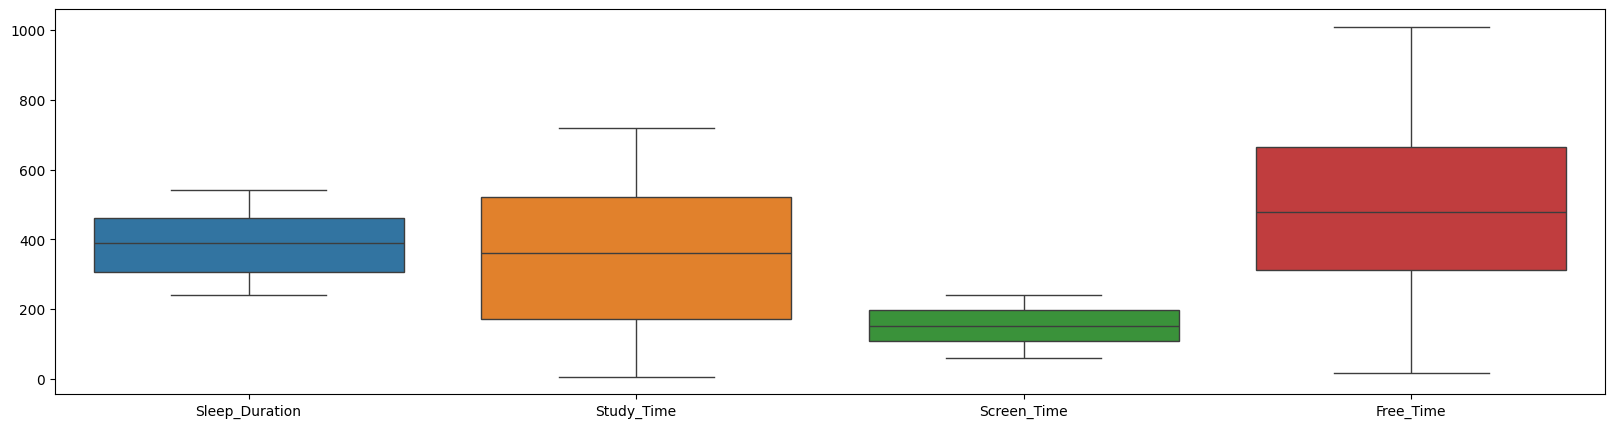

In [55]:
plt.figure(figsize=(20,5)) #defining the size of plot
sns.boxplot(df[["Sleep_Duration", "Study_Time", "Screen_Time", 'Free_Time']]) #making the plot, which shows us the range of values etc.

comparison of sleep duration and quality of sleep (there is no such big and obvious dependence, so it's not important parameter)

<Axes: xlabel='Sleep_Duration'>

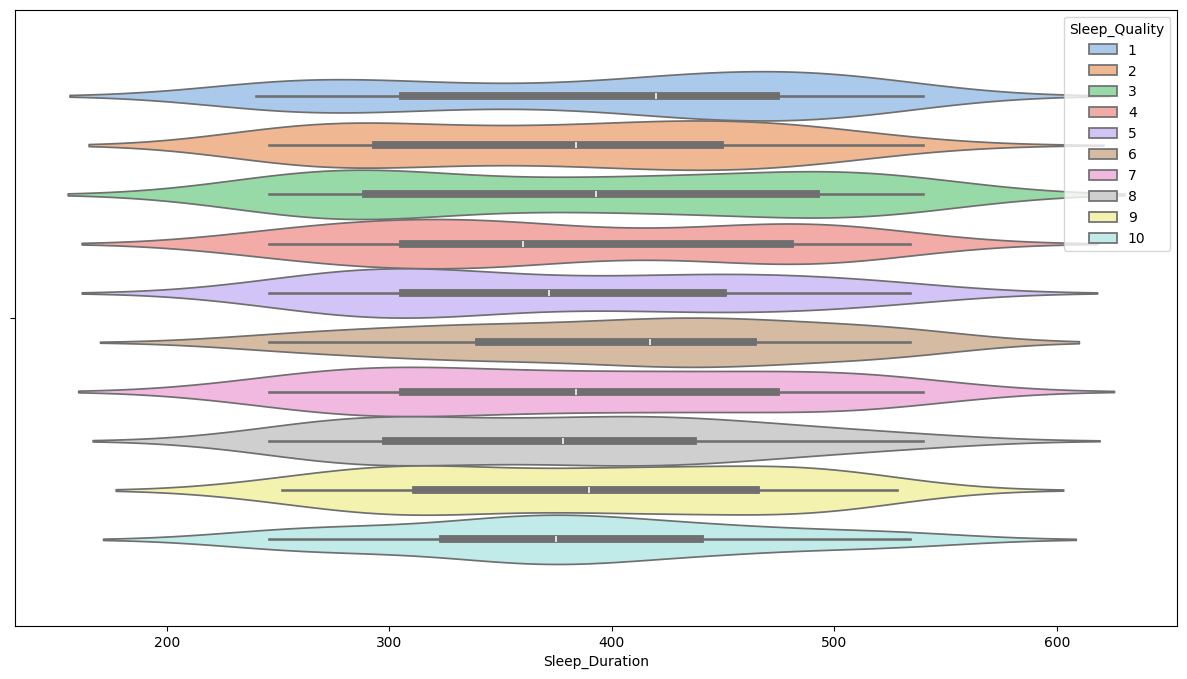

In [56]:
plt.figure(figsize=(15,8)) #defining the size of plot

sns.violinplot(df, x="Sleep_Duration", hue="Sleep_Quality",palette="pastel")#creating the plot, which helps to observe the distribution of numeric data 

comparison of amount of study time and quality of sleep (there is no such big and obvious dependence)

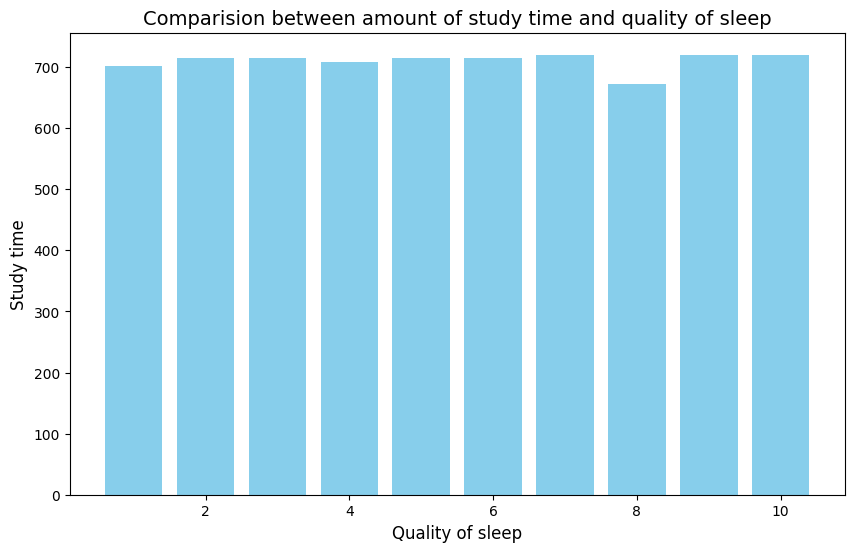

In [57]:
plt.figure(figsize=(10, 6)) #defining the size of plot
plt.bar(df['Sleep_Quality'], df['Study_Time'], color='skyblue') #x, y - columns for creating the plot
plt.title('Comparison between amount of study time and quality of sleep', fontsize=14) # heading of the plot
plt.xlabel('Quality of sleep', fontsize=12) #creating the name and size of it for x
plt.ylabel('Study time', fontsize=12) #creating the name and size of it for y
plt.show() #showing the plot

<Axes: xlabel='Free_Time'>

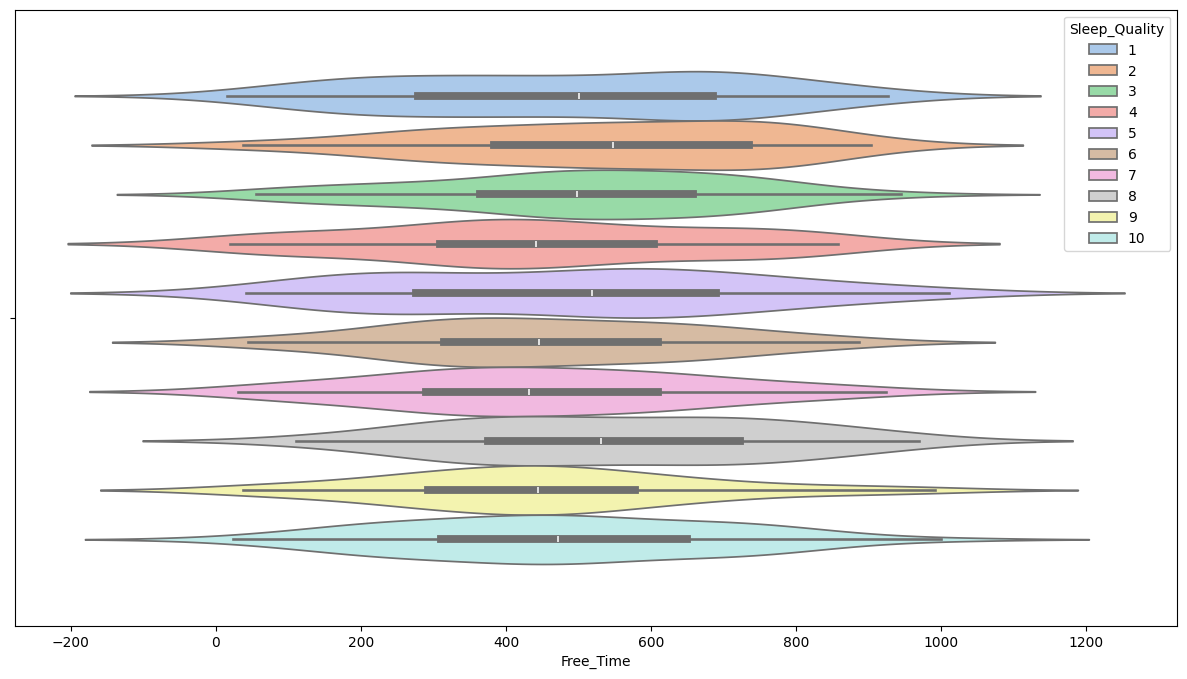

In [58]:
plt.figure(figsize=(15,8))#defining the size of plot

sns.violinplot(df, x="Free_Time", hue="Sleep_Quality",palette="pastel") #creating the plot to find any dependence

comparison between caffeine intake and quality of sleep (there is no such big and obvious dependence)

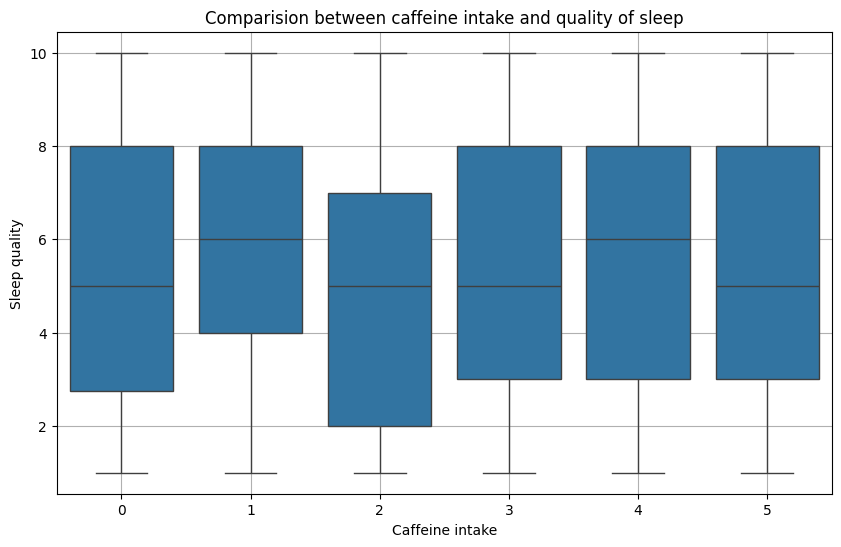

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Caffeine_Intake', y='Sleep_Quality', data=df)
plt.title('Comparison between caffeine intake and quality of sleep')
plt.xlabel('Caffeine intake')
plt.ylabel('Sleep quality')
plt.grid(True)#creating of net
plt.show()

comparison between physical activity and quality of sleep (there is no such big and obvious dependence)

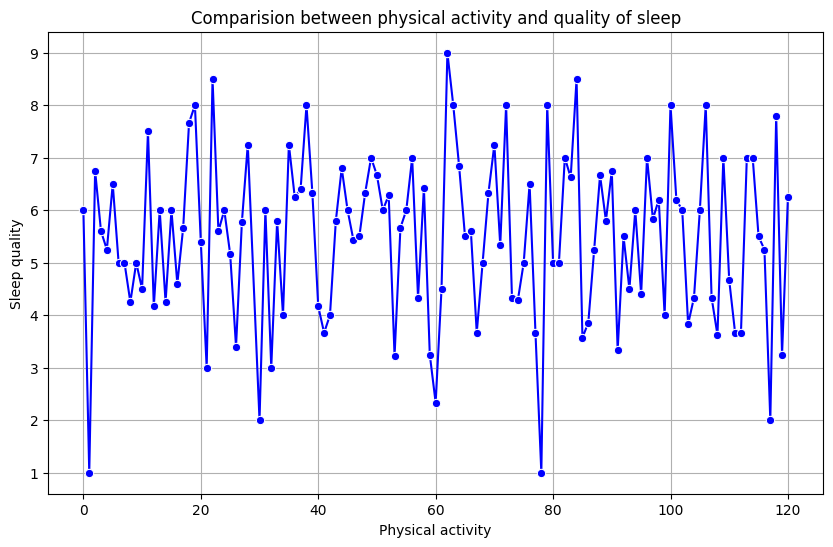

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Physical_Activity', y='Sleep_Quality', data=df, marker='o', color='blue', errorbar=None) #last - delete the range of other points
plt.title('Comparison between physical activity and quality of sleep')
plt.xlabel('Physical activity')
plt.ylabel('Sleep quality')
plt.grid(True)
plt.show()

comparison between screen time and quality of sleep (there is no such big and obvious dependence)

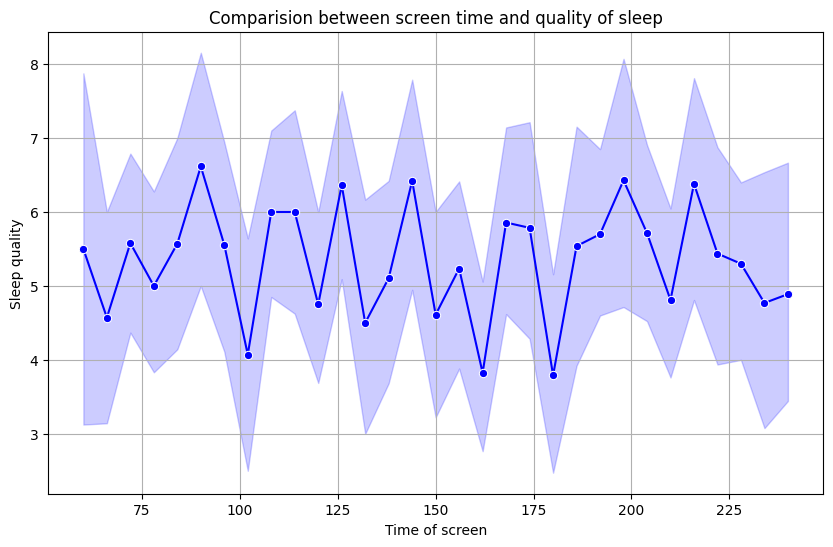

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Screen_Time', y='Sleep_Quality', data=df, marker="o", color='blue')
plt.title('Comparison between screen time and quality of sleep')
plt.xlabel('Time of screen')
plt.ylabel('Sleep quality')
plt.grid(True)
plt.show()

comparison between study time and screen time, which can influence on quality of sleep (there is no such big and obvious dependence)

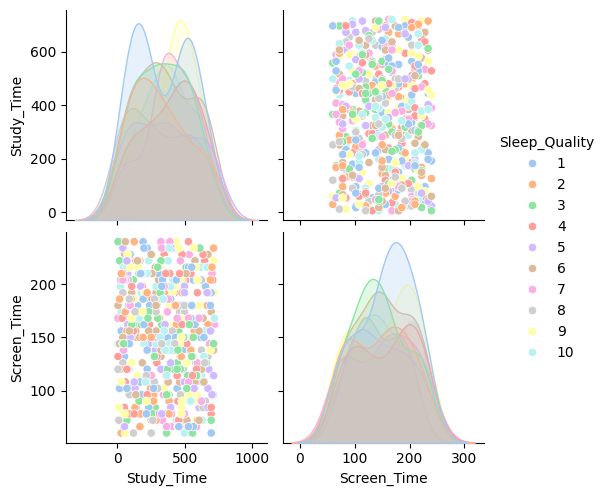

In [62]:
sns.pairplot(df[['Study_Time','Sleep_Quality', 'Screen_Time']],hue="Sleep_Quality",palette="pastel")

visualisation of how quality of sleep depends on different time spending, there is no such a big correlation to prove our hypothesis

<Figure size 1000x800 with 0 Axes>

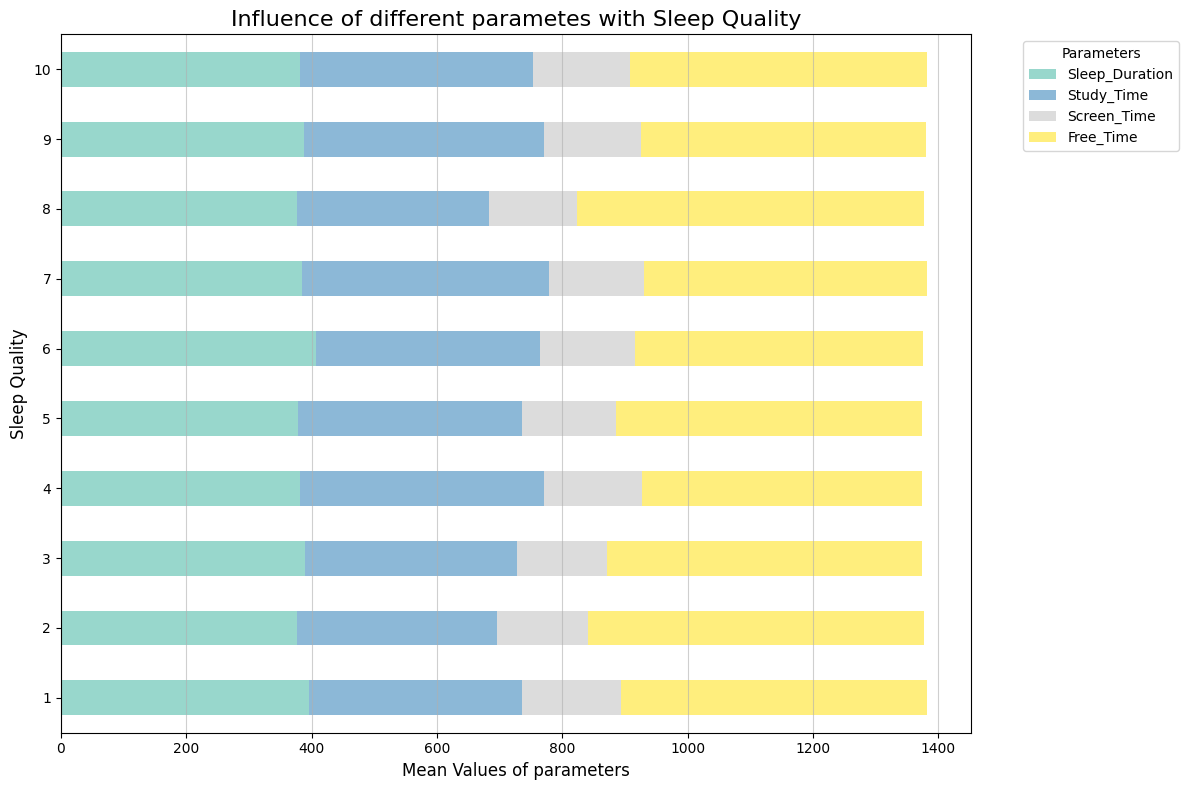

In [63]:
plt.figure(figsize=(10, 8))
df[['Sleep_Quality', 'Sleep_Duration', 'Study_Time', 'Screen_Time', 'Free_Time']].groupby('Sleep_Quality').mean().plot(kind='barh', stacked=True, alpha=0.9, colormap='Set3', figsize=(12, 8))
plt.title('Influence of different parameters with Sleep Quality', fontsize=16)
plt.xlabel('Mean Values of parameters', fontsize=12)
plt.ylabel('Sleep Quality', fontsize=12)
plt.legend(title='Parameters', bbox_to_anchor=(1.05, 1), loc='upper left') #creating the colours and lists of parameters for comparison
plt.grid(axis='x', linestyle='-', alpha=0.6) #creating the line for each 200
plt.tight_layout()
plt.show()

correlation heatmap, which shows that correlation is too small to say that different factors affects to quality of sleep

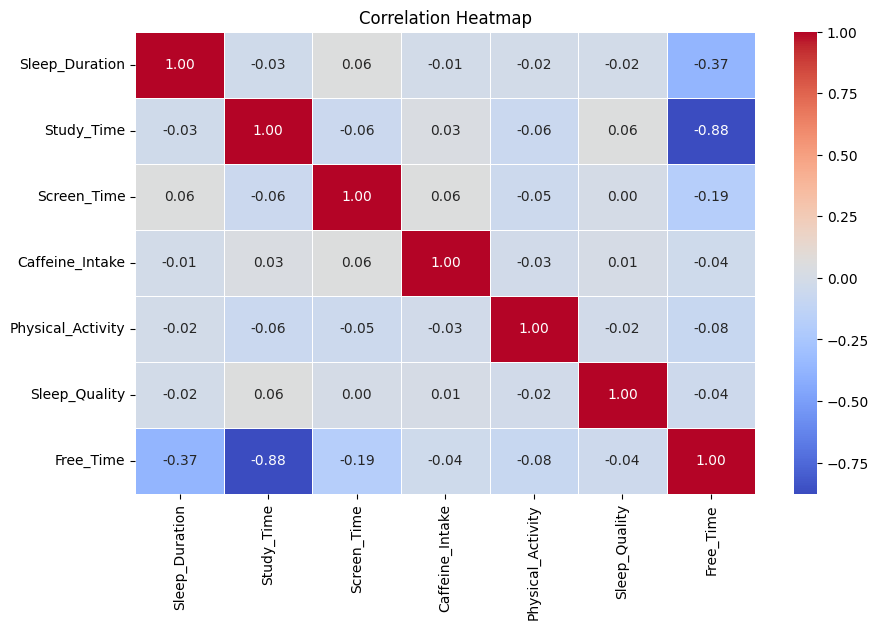

In [64]:
corr = df[['Sleep_Duration', 'Study_Time', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality', 'Free_Time']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Conclusion

Our hypothesis is disproved, as there is not such a big correlation between factors and their relation to quality of sleep to make any decisions.